In [25]:
import iris
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import iris.coord_categorisation
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [71]:
def extract_region(cube,lon_west,lon_east,lat_south,lat_north):
    cube_region_tmp = cube.intersection(longitude=(lon_west, lon_east))
    cube_region = cube_region_tmp.intersection(latitude=(lat_south, lat_north))
    return cube_region


def area_max(cube):
    try:
        cube.coord('latitude').guess_bounds()
    except:
        pass
    try:
        cube.coord('longitude').guess_bounds()
    except:
        pass
    grid_areas = iris.analysis.cartography.area_weights(cube)
    return cube.collapsed(['longitude', 'latitude'], iris.analysis.PERCENTILE, percent=[95])


In [8]:
directory = '/Users/ph290/Documents/HalloranSync/documents/jupyter_github/Jupiter_notebooks_halloran/data/'
file = directory+'CCAR_recon_sea_level_v1.nc'

In [19]:
cube = iris.load_cube(file)

In [26]:
try:
    iris.coord_categorisation.add_year(cube, 'time', name='year')
except:
    pass

In [31]:
loc = np.where((cube.coord('year').points >= 1993) & (cube.coord('year').points <= 2009))
cube = cube[loc]

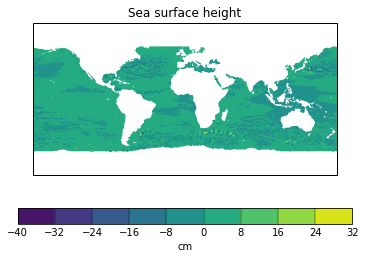

In [32]:
qplt.contourf(cube[0])

In [33]:
def spatial_trend(cube):
    var,lon,lat,time = cube.data,cube.coord('longitude').points,cube.coord('latitude').points,cube.coord('year').points
    cube_out = cube[0].copy()
    # def l_trend(var,lon,lat,time):
    nlon=len(lon)
    nlat=len(lat)
    nt=len(time)
    m = np.zeros([nlat,nlon])
    # c = np.zeros([nlat,nlon])
    x=np.arange(nt)
    x1 = np.c_[x, np.ones_like(x)]
    for i in range(nlat):
        r = np.linalg.lstsq(x1, var[:,i,:])[0]
        m[i,:] = r[0]
    #     c[i,:] = r[1]
    cube_out.data = m
    return cube_out

cube_trend = spatial_trend(cube)

In [64]:
lon_west = 120
lon_east = 170
lon_west = -180
lon_east = 180
lat_south = -45
lat_north = 45
cube_trend_region = extract_region(cube_trend,lon_west,lon_east,lat_south,lat_north)


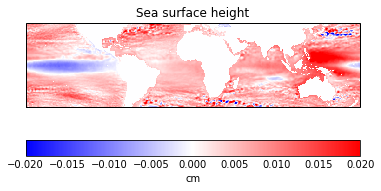

In [65]:
qplt.pcolormesh(cube_trend_region,vmin = -0.02,vmax=0.02,cmap='bwr')

In [69]:
file2 = directory+'HadISST_sst.nc'
cube2 = iris.load_cube(file2,'sea_surface_temperature')



In [72]:
lon_west = 142
lon_east = 147
lat_south = -16
lat_north = -10
cube_all_region_area_avg_1 = area_max(extract_region(cube2,lon_west,lon_east,lat_south,lat_north))
lon_west = 144
lon_east = 152
lat_south = -21
lat_north = -16
cube_all_region_area_avg_2 = area_max(extract_region(cube2,lon_west,lon_east,lat_south,lat_north))
lon_west = 146
lon_east = 156
lat_south = -29
lat_north = -21
cube_all_region_area_avg_3 = area_max(extract_region(cube2,lon_west,lon_east,lat_south,lat_north))


/Users/ph290/miniconda2/lib/python2.7/site-packages/iris/analysis/cartography.py:376: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


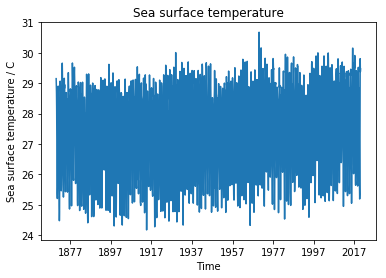

In [73]:
qplt.plot(cube_all_region_area_avg_1)